# Wine Classification with Machine Learning 

## Load the Dataset

In [1]:
import pandas as pd

# Load Wine dataset
df = pd.read_csv("C:/Users/tinot/Downloads/wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Exploration

In [2]:
df.info()

# Statistical summary
df.describe()

# Distribution
df['Wine'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Wine
2    71
1    59
3    48
Name: count, dtype: int64

The dataset has no missing values and good across three wine classes. Summary statistics reveal variate in chemical such as Alcohol, Flavanoids and Proline

##  Visualise Feature Distribution  


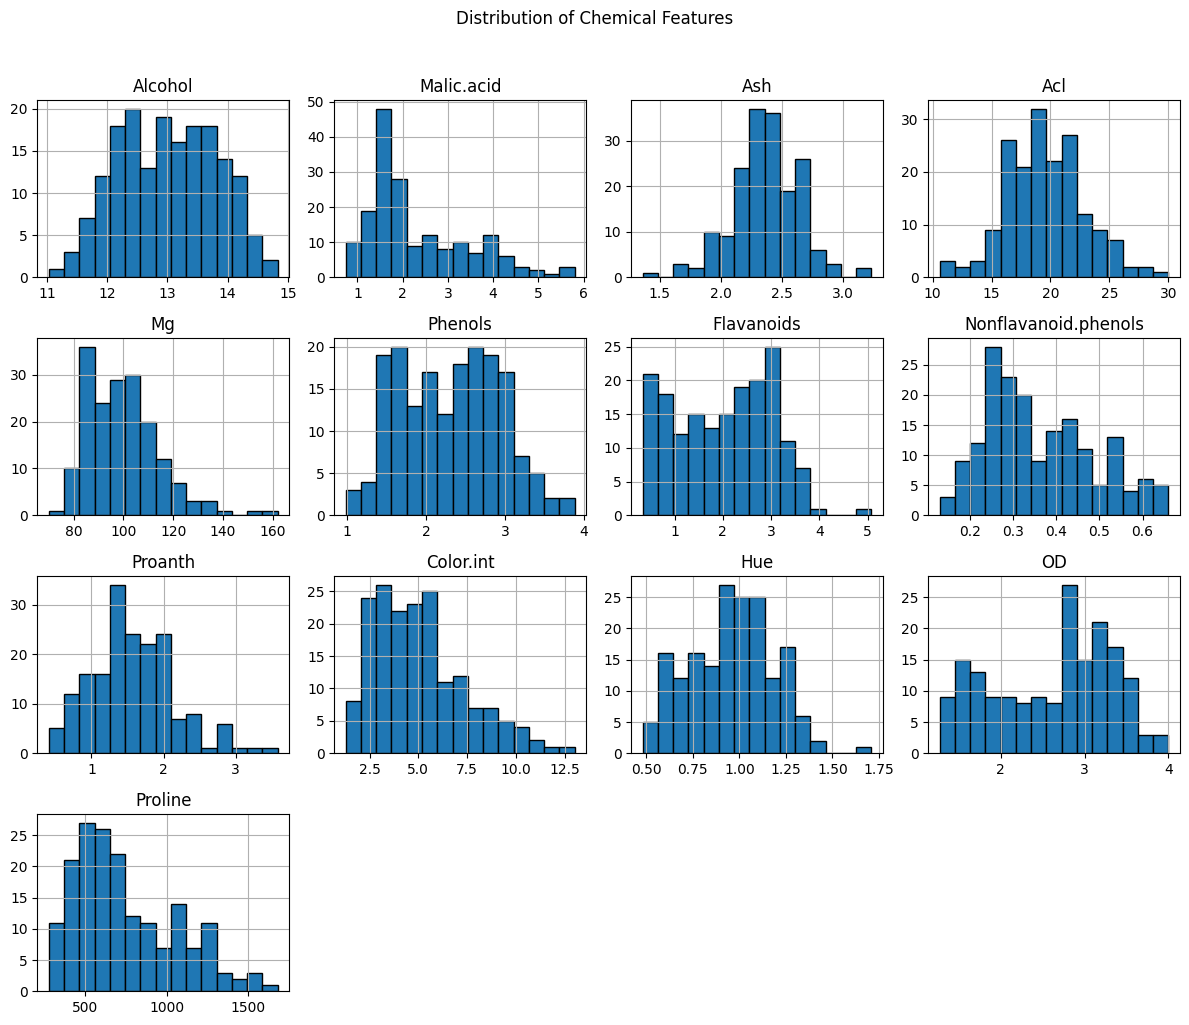

In [3]:
import matplotlib.pyplot as plt

# Target column and plot histograms
df.drop('Wine', axis=1).hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle("Distribution of Chemical Features", y=1.02)
plt.tight_layout()
plt.show()

The histograms reveal that features such as alcohol, flavanoids, and poline have noticeable variation across samples. Some features show skewness which may affect model performance and benefit from scaling

## Data Preprocessing 

In [5]:
print(df.isnull().sum())

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Wine', axis=1)
y = df['Wine']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## Model Selection 

In [7]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svm_model = SVC(probability=True, random_state=42)
knn_model = KNeighborsClassifier()

svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

SVM is effective for high-dimensional data while kNN is simple, non-parametric method that relies on distance metrics

## Model Evaluation

SVM Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

kNN Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



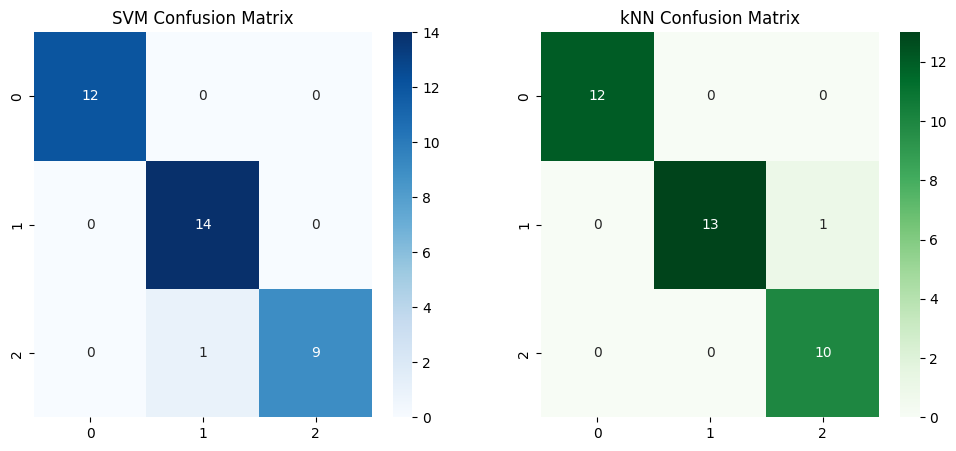

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

print("SVM Report:\n", classification_report(y_test, svm_pred))
print("kNN Report:\n", classification_report(y_test, knn_pred))


fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title("SVM Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title("kNN Confusion Matrix")
plt.show()

## Model comparison 

SVM achieved higher precision and recall across all classes, indicating better generalization. kNN struggled with class 2, possibly due to overlapping feature distributions. SVM’s margin-based approach likely contributed to its superior performance.

## Task 6 interpretation 

In [2]:
from sklearn.svm import SVC


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("C:/Users/tinot/Downloads/wine.csv")

# Separate features and target
X = df.drop('Wine', axis=1)
y = df['Wine']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

## Reflection
This assignment deepened my understanding of how chemical properties influence wine classification. I learned how to preprocess data, apply multiple machine learning models and interpret feature importance. SVM performed best likely due to ability for separate classes in high dimensional space. Future improvements could include hyperparameter tuning.

## References
- UCI Machine Learning Repository. (n.d.). Wine Data Set. Retrieved from https://archive.ics.uci.edu/ml/datasets/wine
- Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.